In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# api_url = "https://api.eia.gov/v2/electricity/rto/daily-interchange-data/data/"
# api_key = "tNe3AF1lpWiiJruY0g16RvMRcAoiJcE9Iga68fDc"

# params = {
#     "api_key": api_key,
#     "frequency": "daily",
#     "data[0]": "value",
#     "facets[fromba][]": ["ISNE", "NYIS", "PJM"],
#     "start": "2019-01-01",
#     "end": "2024-11-23",
#     "sort[0][column]": "period",
#     "sort[0][direction]": "desc",
#     "offset": 0,
#     "length": 5000
# }

# response = requests.get(api_url, params=params)

# if response.status_code == 200:
#     data = response.json()
#     if "response" in data and "data" in data["response"]:
#         df = pd.DataFrame(data["response"]["data"])
#         print("Data fetched successfully!")
#         print(df.head())  
#         print("No data found in the response.")
# else:
#     print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
#     print(response.text)


In [102]:
## Adding pagination to get net exchanges 

api_url = "https://api.eia.gov/v2/electricity/rto/daily-interchange-data/data/"
api_key = "tNe3AF1lpWiiJruY0g16RvMRcAoiJcE9Iga68fDc"

params = {
    "api_key": api_key,
    "frequency": "daily",
    "data[0]": "value",
    "facets[fromba][]": ["ISNE", "MISO", "NYIS", "PJM"],
    "start": "2016-01-01",
    "end": "2022-11-23",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000
}

all_data = pd.DataFrame()

while True:
    response = requests.get(api_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if "response" in data and "data" in data["response"]:
            df = pd.DataFrame(data["response"]["data"])
            all_data = pd.concat([all_data, df], ignore_index=True)
            
            if len(df) < params["length"]:
                break  
            
            params["offset"] += params["length"]
        else:
            print("No data found in the response.")
            break
    else:
        print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
        print(response.text)
        break

print("Data fetched successfully!")
print(all_data.head())

Data fetched successfully!
       period fromba      fromba-name toba                  toba-name  \
0  2022-11-23   ISNE  ISO New England  HQT  Hydro-Quebec TransEnergie   
1  2022-11-23   ISNE  ISO New England  HQT  Hydro-Quebec TransEnergie   
2  2022-11-23   ISNE  ISO New England  HQT  Hydro-Quebec TransEnergie   
3  2022-11-23   ISNE  ISO New England  HQT  Hydro-Quebec TransEnergie   
4  2022-11-23   ISNE  ISO New England  HQT  Hydro-Quebec TransEnergie   

   timezone   value    value-units  
0   Arizona  -37073  megawatthours  
1   Central  -37071  megawatthours  
2   Eastern  -37069  megawatthours  
3  Mountain  -37073  megawatthours  
4   Pacific  -37075  megawatthours  


In [103]:
# Data cleaning 

all_data["value"] = pd.to_numeric(all_data["value"])
all_data["period"] = pd.to_datetime(all_data["period"])



### Graphing Flows

C:\Users\Alex Child\AppData\Local\Temp\ipykernel_13808\3485701777.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



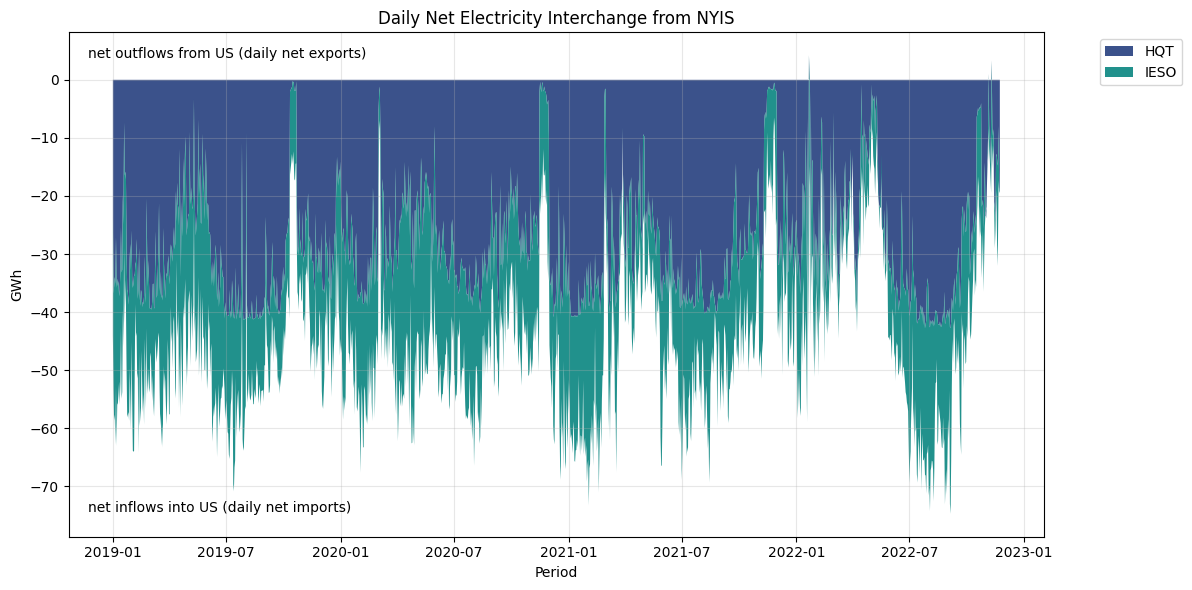

In [104]:
target_fromba = 'NYIS'
selected_tobas  = ['HQT', 'IESO','NBSO'] 

filtered_df = all_data[
    (all_data['fromba'] == target_fromba) & 
    (all_data['toba'].isin(selected_tobas)) &
    (all_data['timezone'] == 'Eastern')
]

filtered_df['value'] = filtered_df['value'] / 1e3  

pivot_df = filtered_df.pivot_table(
    index='period',
    columns='toba',
    values='value',
    aggfunc='sum'
).fillna(0)

colors = sns.color_palette('viridis', n_colors=len(selected_tobas))
fig, ax = plt.subplots(figsize=(12, 6))

ax.stackplot(pivot_df.index, 
            [pivot_df[col] for col in pivot_df.columns],
            labels=pivot_df.columns,
            colors=colors)

ax.text(0.02, 0.95, 'net outflows from US (daily net exports)', 
        transform=ax.transAxes, fontsize=10)
ax.text(0.02, 0.05, 'net inflows into US (daily net imports)', 
        transform=ax.transAxes, fontsize=10)

plt.title(f'Daily Net Electricity Interchange from {target_fromba}')
plt.xlabel('Period')
plt.ylabel('GWh')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Alex Child\AppData\Local\Temp\ipykernel_13808\1667926274.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



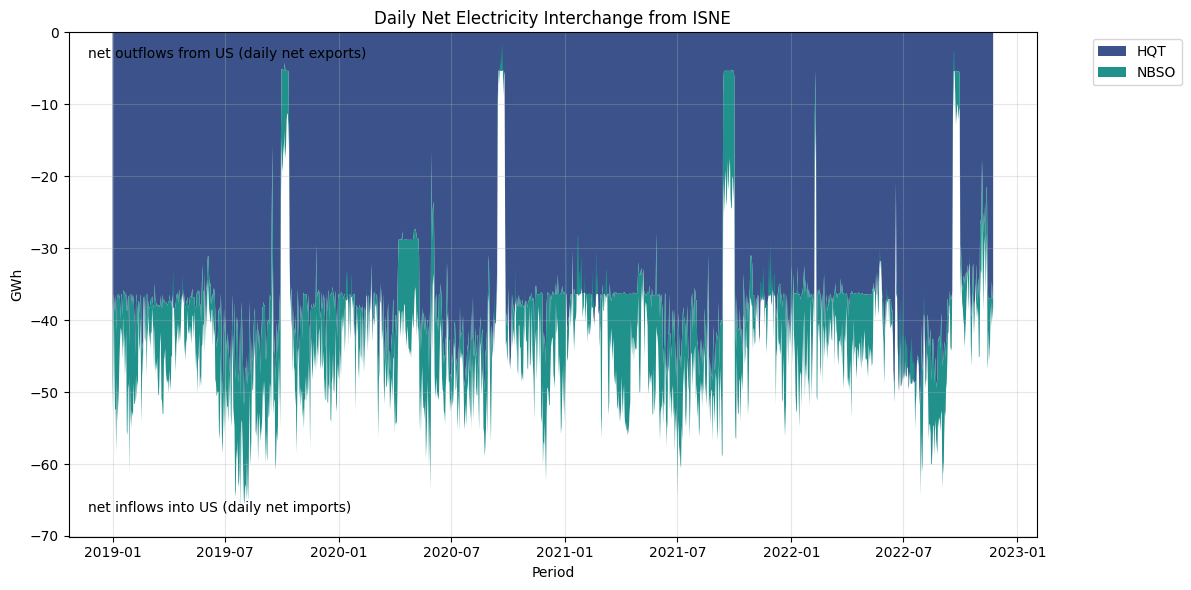

In [105]:
target_fromba = 'ISNE'
selected_tobas  = ['HQT', 'IESO','NBSO'] 

filtered_df = all_data[
    (all_data['fromba'] == target_fromba) & 
    (all_data['toba'].isin(selected_tobas)) &
    (all_data['timezone'] == 'Eastern')
]

filtered_df['value'] = filtered_df['value'] / 1e3  

pivot_df = filtered_df.pivot_table(
    index='period',
    columns='toba',
    values='value',
    aggfunc='sum'
).fillna(0)

colors = sns.color_palette('viridis', n_colors=len(selected_tobas))
fig, ax = plt.subplots(figsize=(12, 6))

ax.stackplot(pivot_df.index, 
            [pivot_df[col] for col in pivot_df.columns],
            labels=pivot_df.columns,
            colors=colors)

ax.text(0.02, 0.95, 'net outflows from US (daily net exports)', 
        transform=ax.transAxes, fontsize=10)
ax.text(0.02, 0.05, 'net inflows into US (daily net imports)', 
        transform=ax.transAxes, fontsize=10)

plt.title(f'Daily Net Electricity Interchange from {target_fromba}')
plt.xlabel('Period')
plt.ylabel('GWh')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [106]:
pivot_df

toba,HQT,NBSO
period,,
2019-01-01,-37.595,-15.020
2019-01-02,-40.062,-6.086
2019-01-03,-36.326,-0.877
2019-01-04,-37.757,-9.105
2019-01-05,-38.900,-13.535
...,...,...
2022-11-19,-37.064,-0.965
2022-11-20,-37.025,-3.875
2022-11-21,-34.568,-2.779


In [107]:
## Calculating just flows and saving into its own df 

partners = ['HQT', 'IESO', 'NBSO']
isos = ['ISNE', 'NYIS','PJM']

net_flows = []

for iso in isos:
  flows = all_data[
      (all_data['fromba'] == iso) & 
      (all_data['toba'].isin(partners)) &
      (all_data['timezone'] == 'Eastern')
  ].groupby('period')['value'].sum()
  
  net_flows.append(flows)

flows_df = pd.DataFrame({
  'ISNE': net_flows[0],
  'NYIS': net_flows[1],
  'PJM': net_flows[2]
})

flows_df = flows_df * -1
#flows_df[flows_df < 0] = 0



In [108]:
px.line(flows_df)

In [111]:
## Getting the generation data 

api_url = "https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/"
api_key = "tNe3AF1lpWiiJruY0g16RvMRcAoiJcE9Iga68fDc"

params = {
    "api_key": api_key,
    "frequency": "daily",
    "data[0]": "value",
    "facets[respondent][]": ["ISNE", "NYIS","PJM"], #
    "start": "2016-01-01",
    "end": "2024-11-29",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 50000
}

all_gen_data = pd.DataFrame()

while True:
    response = requests.get(api_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if "response" in data and "data" in data["response"]:
            df = pd.DataFrame(data["response"]["data"])
            all_gen_data = pd.concat([all_gen_data, df], ignore_index=True)
            
            if len(df) < params["length"]:
                break  
            
            params["offset"] += params["length"]
        else:
            print("No data found in the response.")
            break
    else:
        print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")
        print(response.text)
        break

print("Data fetched successfully!")
print(all_gen_data.head())

Data fetched successfully!
       period respondent  respondent-name fueltype        type-name  timezone  \
0  2024-11-29       ISNE  ISO New England      BAT  Battery storage   Arizona   
1  2024-11-29       ISNE  ISO New England      BAT  Battery storage   Central   
2  2024-11-29       ISNE  ISO New England      BAT  Battery storage   Eastern   
3  2024-11-29       ISNE  ISO New England      BAT  Battery storage  Mountain   
4  2024-11-29       ISNE  ISO New England      BAT  Battery storage   Pacific   

  timezone-description value    value-units  
0              Arizona   338  megawatthours  
1              Central   336  megawatthours  
2              Eastern   336  megawatthours  
3             Mountain   338  megawatthours  
4              Pacific   330  megawatthours  


In [119]:
all_gen_data.query('respondent=="PJM"').head(20)

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
90,2024-11-29,PJM,"PJM Interconnection, LLC",COL,Coal,Arizona,Arizona,312112,megawatthours
91,2024-11-29,PJM,"PJM Interconnection, LLC",COL,Coal,Central,Central,309490,megawatthours
92,2024-11-29,PJM,"PJM Interconnection, LLC",COL,Coal,Eastern,Eastern,306525,megawatthours
93,2024-11-29,PJM,"PJM Interconnection, LLC",COL,Coal,Mountain,Mountain,312112,megawatthours
94,2024-11-29,PJM,"PJM Interconnection, LLC",COL,Coal,Pacific,Pacific,314809,megawatthours
95,2024-11-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Arizona,Arizona,931019,megawatthours
96,2024-11-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Central,Central,923541,megawatthours
97,2024-11-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Eastern,Eastern,915891,megawatthours
98,2024-11-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Mountain,Mountain,931019,megawatthours
99,2024-11-29,PJM,"PJM Interconnection, LLC",NG,Natural Gas,Pacific,Pacific,936987,megawatthours


### Get Yearly Gen

In [113]:


all_gen_data['period'] = pd.to_datetime(all_gen_data['period'])
all_gen_data['value'] = pd.to_numeric(all_gen_data['value'])

isne_gen = all_gen_data[
   (all_gen_data['respondent'] == 'ISNE') & 
   (all_gen_data['timezone'] == 'Eastern')
].pivot_table(
   index='period',
   columns='type-name',
   values='value',
   aggfunc='sum'
).fillna(0)

nyis_gen = all_gen_data[
   (all_gen_data['respondent'] == 'NYIS') & 
   (all_gen_data['timezone'] == 'Eastern')
].pivot_table(
   index='period',
   columns='type-name', 
   values='value',
   aggfunc='sum'
).fillna(0)

In [114]:
yearly_flows = flows_df.groupby(flows_df.index.year).sum()


In [115]:
## Add yearly imports into yearly gen 

isne_gen['imports'] = flows_df['ISNE']
nyis_gen['imports'] = flows_df['NYIS']

In [116]:
isne_gen

type-name,Battery,Battery storage,Coal,Hydro,Natural Gas,Nuclear,Other,Petroleum,Pumped Storage,Pumped storage,Solar,Solar Battery,Solar with integrated battery storage,Wind,imports
period,,,,,,,,,,,,,,,
2024-10-21,0.0,0.0,45.0,11076.0,180386.0,29341.0,10412.0,1626.0,0.0,0.0,4391.0,0.0,0.0,14553.0,NaN
2024-10-22,0.0,0.0,39.0,11768.0,191536.0,29444.0,9996.0,108.0,0.0,0.0,4606.0,0.0,0.0,5569.0,NaN
2024-10-23,0.0,0.0,33.0,12433.0,190217.0,29411.0,10188.0,99.0,0.0,0.0,4015.0,0.0,0.0,13050.0,NaN
2024-10-24,0.0,0.0,15.0,11746.0,196859.0,29403.0,10333.0,404.0,0.0,0.0,4062.0,0.0,0.0,12276.0,NaN
2024-10-25,0.0,0.0,20.0,11254.0,189794.0,29413.0,10193.0,281.0,0.0,0.0,5280.0,0.0,0.0,6920.0,NaN
2024-10-26,0.0,0.0,19.0,8913.0,169816.0,29526.0,10130.0,305.0,0.0,0.0,3824.0,0.0,0.0,17868.0,NaN
2024-10-27,0.0,0.0,21.0,12236.0,165105.0,29537.0,9893.0,0.0,0.0,0.0,4717.0,0.0,0.0,20958.0,NaN
2024-10-28,0.0,0.0,25.0,13892.0,203842.0,29503.0,10352.0,597.0,0.0,0.0,4196.0,0.0,0.0,9513.0,NaN
2024-10-29,0.0,0.0,78.0,10480.0,225215.0,29442.0,9346.0,1052.0,0.0,0.0,1645.0,0.0,0.0,6925.0,NaN


In [44]:
import plotly.express as px

In [78]:
px.line(nyis_gen[['Natural Gas','imports','Hydro']].rolling(180).mean())

In [45]:
nyis_gen['total_gen'] = nyis_gen.iloc[:,:-1].sum(axis=1)

In [68]:
fig = px.scatter(nyis_gen.loc['2023':],x='imports',y='Natural Gas',trendline='ols')

In [69]:
px.get_trendline_results(fig).iloc[0][0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.58
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           0.000705
Time:                        08:23:16   Log-Likelihood:                -8475.2
No. Observations:                 693   AIC:                         1.695e+04
Df Residuals:                     691   BIC:                         1.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.693e+05   2640.659     64.125      0.000    1.64e+05    1.75e+05
x1             0.3990      0.117      3.403      0.001       0.169       0.629
==============================================================================
Omnibus:                      102.484   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.943
Skew:                           1.009   Prob(JB):                     1.01e-33
Kurtosis:                       4.090   Cond. No.                     3.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
nyis_gen['total'] = nyis_gen.sum(axis=1)
nyis_gen['import_share'] = (nyis_gen['imports'] / nyis_gen['total']) * 100

<AxesSubplot:xlabel='period'>

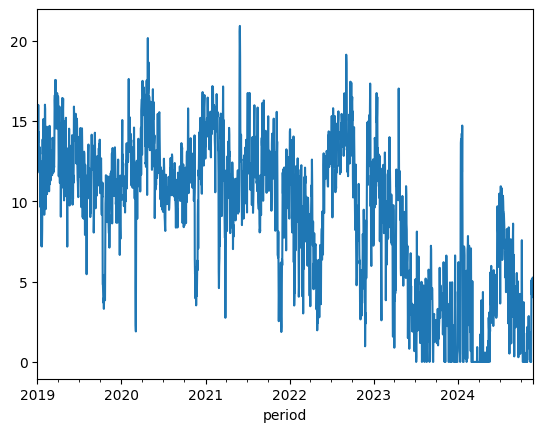

In [14]:
nyis_gen.import_share.plot()

In [15]:
isne_gen['total'] = isne_gen.sum(axis=1)
isne_gen['import_share'] = (isne_gen['imports'] / isne_gen['total']) * 100

<AxesSubplot:xlabel='period'>

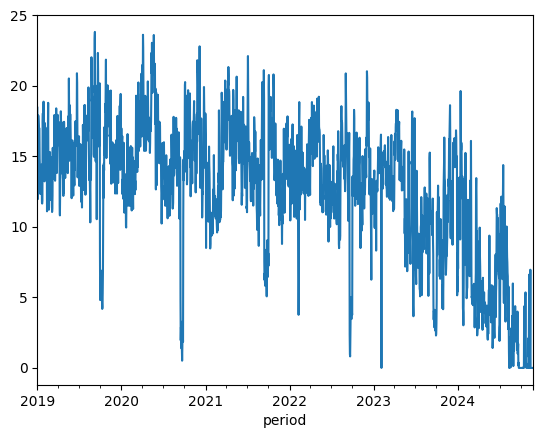

In [16]:
isne_gen.import_share.plot()

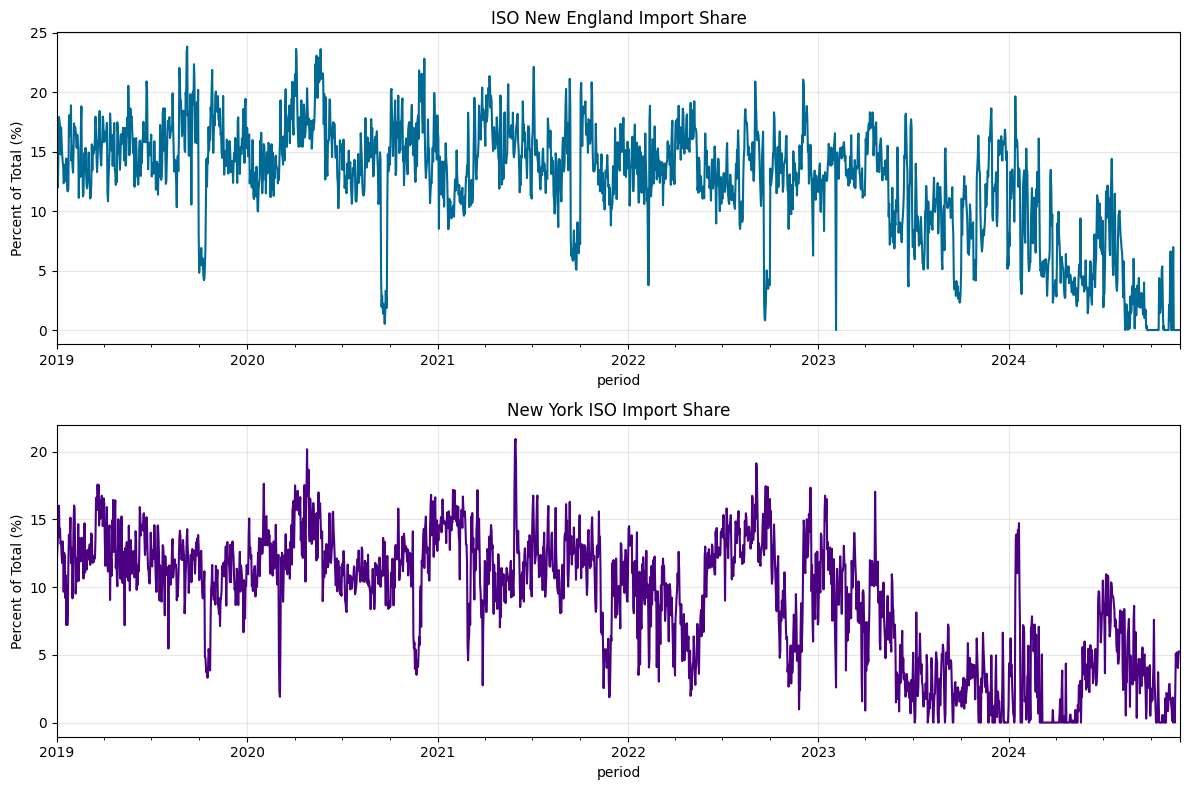

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ISNE Plot
isne_gen['import_share'].plot(ax=ax1, color='#006994')
ax1.set_title('ISO New England Import Share')
ax1.set_ylabel('Percent of Total (%)')
ax1.grid(True, alpha=0.3)

# NYIS Plot
nyis_gen['import_share'].plot(ax=ax2, color='#4B0082')
ax2.set_title('New York ISO Import Share')
ax2.set_ylabel('Percent of Total (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Yearly Sums

In [18]:
isne_gen.head(2)

type-name,Battery,Battery storage,Coal,Hydro,Natural Gas,Nuclear,Other,Petroleum,Pumped Storage,Pumped storage,Solar,Solar Battery,Solar with integrated battery storage,Wind,imports,total,import_share
period,,,,,,,,,,,,,,,,,
2019-01-01,0.0,0.0,0.0,26099.0,74495.0,96569.0,17947.0,0.0,0.0,0.0,250.0,0.0,0.0,17115.0,52615.0,285090.0,18.455575
2019-01-02,0.0,0.0,23.0,29392.0,124471.0,96518.0,17533.0,0.0,0.0,0.0,441.0,0.0,0.0,6371.0,46148.0,320897.0,14.380938


In [19]:
isne_yearly = isne_gen.groupby(isne_gen.index.year).sum()
nyis_yearly = nyis_gen.groupby(nyis_gen.index.year).sum()


In [20]:
isne_yearly

type-name,Battery,Battery storage,Coal,Hydro,Natural Gas,Nuclear,Other,Petroleum,Pumped Storage,Pumped storage,Solar,Solar Battery,Solar with integrated battery storage,Wind,imports,total,import_share
period,,,,,,,,,,,,,,,,,
2019,0.0,0.0,447310.0,8013769.0,47532462.0,29820083.0,5879695.0,156939.0,0.0,0.0,212993.0,0.0,0.0,3477623.0,17043012.0,112583886.0,5560.600904
2020,0.0,0.0,147564.0,7080664.0,49822870.0,25535553.0,5615145.0,161898.0,0.0,0.0,361921.0,0.0,0.0,3548743.0,16191979.0,108466337.0,5554.580702
2021,0.0,0.0,560539.0,6644234.0,54269661.0,27030891.0,5711995.0,228147.0,0.0,0.0,538000.0,0.0,0.0,3575576.0,16047032.0,114606075.0,5185.729542
2022,0.0,0.0,319198.0,7143699.0,53757059.0,27370441.0,5028482.0,1848177.0,0.0,0.0,907817.0,0.0,0.0,3831129.0,15533583.0,115739585.0,4939.240855
2023,0.0,0.0,181475.0,8774985.0,55466242.0,23170861.0,4809460.0,323079.0,0.0,0.0,889930.0,0.0,0.0,3247468.0,12528275.0,109391775.0,4197.979949
2024,232.0,3683.0,114393.0,6859093.0,54377814.0,23641097.0,4205878.0,188796.0,6672.0,125045.0,1246175.0,52.0,866.0,3106507.0,5538550.0,99414853.0,1734.742354


In [21]:
nyis_yearly

type-name,Coal,Hydro,Natural Gas,Nuclear,Other,Petroleum,Solar,Wind,imports,total,import_share
period,,,,,,,,,,,
2019,0,28809383,45516620,44110127,4603667,3799282,0,4385557,17445075.0,148669711.0,4299.513488
2020,0,28124937,50487619,37741597,2451420,5368359,0,4391524,17347265.0,145912721.0,4393.154928
2021,0,27252235,55785737,29486016,3028321,4449854,0,4058992,16542036.0,140603191.0,4278.795342
2022,0,26182462,60257059,25047231,3202629,4885342,0,4769683,14497196.0,138841602.0,3740.733667
2023,0,26836657,61001524,23998351,4960308,2173880,0,4600015,6953976.0,130524711.0,1969.903013
2024,0,24243796,61022197,23091492,3139116,276644,0,5243150,4619313.0,121635708.0,1130.817072
